In [276]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

import flash_PBeta


In [277]:
reload(flash_PBeta)
from flash_PBeta import flash_PBeta
from m_vEoS import c_vEoS


Ncomp = 2

Tc = np.array([304.1,  190.555]) #K
Pc = np.array([73.8e5,  45.95e5]) #Pa
w = np.array([0.239,  0.008]) #dimensionless

kij = np.array([[0,0.0919],
                [0.0919,0],]) #dimensionless

#load_flash_PBeta(Tc,Pc,w,kij,Ncomp)
eos = c_vEoS(Ncomp,Tc,Pc,w,kij)


In [278]:
z = np.array([0.25, 0.75])

P_guess = 1e5
#P_grid = np.linspace(5e5,90e5,500)
P_grid2 = np.zeros(10000)
iterations2 = np.zeros(10000)
BETA = 0.
T_guess = 100

P_grid2[0] = 1e5
P_grid2[1] = 1.5e5

delta_T = 2

x2 = np.zeros([10000,2])
y2 = np.zeros([10000,2])
T2 = np.ones(10000)*200

K = np.exp(np.log(Pc/P_guess)+5.373*(1.+w)*(1.-Tc/T_guess))

ans = flash_PBeta(T_guess,P_grid2[0],z,BETA,K,Ncomp,eos)
x2[0,:] = ans[0]
y2[0,:] = ans[1] 
K_old_old = ans[2]
T2[0] = ans[3]
iterations2[0] = ans[4]

T_guess = T2[0]

ans = flash_PBeta(T_guess,P_grid2[1],z,BETA,K_old_old,Ncomp,eos)
x2[1,:] = ans[0]
y2[1,:] = ans[1] 
K_old = ans[2]
T2[1] = ans[3]
iterations2[1] = ans[4]

T_guess = T2[1]

In [279]:
i = 0
while max(abs(np.log(K)))>=0.07:
#for i in range(len(P_grid2)-2):

    P_grid2[i+2] = P_grid2[i+1] + (P_grid2[i+1] - P_grid2[i])*(delta_T*(9/(i+1)/(T2[i+1]-T2[i])))
    K = K_old + (K_old - K_old_old)*delta_T*(9/(i+1))/(T2[i+1]-T2[i])
    ans = flash_PBeta(T_guess,P_grid2[i+2],z,BETA,K,Ncomp,eos)
    x2[i+2,:] = ans[0]
    y2[i+2,:] = ans[1]
    K_old_old = K_old 
    K_old = ans[2]
    T2[i+2] = ans[3]
    iterations2[i+2] = ans[4]
    T_guess = T2[i+2]
    print(i,P_grid2[i+2],T2[i+2],np.log(K_old),iterations2[i+2])
    i+=1

                 #0,1,2 => 0:3
#trimmed=original[0:final+1,inicio:final+1].copy()


0 315260.805454 128.960372641 [-4.50602135  0.28491768] 3.0
1 443807.69432 135.122845315 [-4.09664852  0.28351633] 3.0
2 568965.463609 139.99082978 [-3.79737676  0.28205891] 3.0
3 684662.209521 143.855577855 [-3.57307337  0.28063997] 3.0
4 792433.344213 147.062932453 [-3.39496916  0.27926132] 3.0
5 893237.104494 149.798980685 [-3.24832635  0.27792484] 3.0
6 987975.810587 152.182396546 [-3.12426845  0.27662894] 3.0
7 1077411.35233 154.292522178 [-3.01711737  0.27537108] 3.0
8 1162179.33047 156.184894161 [-2.92304329  0.27414845] 3.0
9 1242809.5459 157.899824362 [-2.83935304  0.27295834] 3.0
10 1319745.82729 159.467460831 [-2.76408739  0.27179819] 3.0
11 1393362.65387 160.910919217 [-2.69578038  0.27066569] 3.0
12 1463978.46907 162.248300594 [-2.63330891  0.26955874] 3.0
13 1531866.18158 163.494037258 [-2.57579502  0.26847548] 3.0
14 1597261.42714 164.65981726 [-2.52254037  0.26741419] 3.0
15 1660369.08991 165.755236024 [-2.47298103  0.26637338] 3.0
16 1721368.48158 166.788266029 [-2.426

In [280]:
P_grid2 = P_grid2[0:i+2].copy()
T2 = T2[0:i+2].copy()
x2 = x2[0:i+2,:].copy()
y2 = y2[0:i+2,:].copy()

print(P_grid2,T2,x2,y2)

[  100000.           150000.           315260.805454     443807.69432046
   568965.46360918   684662.20952056   792433.34421286   893237.10449378
   987975.8105872   1077411.35232999  1162179.33046972  1242809.54590418
  1319745.8272902   1393362.65387074  1463978.46906878  1531866.18158497
  1597261.42713521  1660369.08990672  1721368.48157923  1780417.48435091
  1837655.89097395  1893208.11848222  1947185.42989175  1999687.76643917
  2050805.2692035   2100619.55114068  2149204.76713064  2196628.51942285
  2242952.62806388  2288233.78987604  2332524.14489546  2375871.76553538
  2418321.08087502  2459913.24620812  2500686.46618068  2540676.2783992
  2579915.80322301  2618435.9645112   2656265.68532172  2693432.06193154
  2729960.51902392  2765874.94846187  2801197.83370979  2835950.36166555
  2870152.52341774  2903823.20523405  2936980.27090577  2969640.63642706
  3001820.33785948  3033534.59312175  3064797.85835576  3095623.87943148
  3126025.73909678  3156015.9002079   3185606.245431

In [284]:
BETA = 1.0
T = np.zeros(10000)
P_grid = np.zeros(10000)
iterations = np.zeros(10000)

x = np.zeros([10000,2])
y = np.zeros([10000,2])

P_grid[0] = P_grid2[len(P_grid2)-1]#- (P_grid2[i+1] - P_grid2[i])*(delta_T*(9/(i+1)/(T2[i+1]-T2[i])))
K = np.exp([-0.06969153,  0.02219145])#K_old#K_old + (K_old - K_old_old)*delta_T*(9/(i+1))/(T2[i+1]-T2[i])
print(K,T2[len(T2)-1]*1.05,P_grid[0])
print('antes do flash')
ans = flash_PBeta(T2[len(T2)-1],P_grid[0],z,BETA,K,Ncomp,eos)
print('depois do flash',ans)
x[0,:] = ans[0]
y[0,:] = ans[1]
K_old_old = K_old
K_old = ans[2]
T[0] = ans[3]
iterations[0] = ans[4]
T_guess = T[0]

print(T[0],P_grid[0],K_old,np.log(K_old))

[ 0.93268148  1.02243951] 231.581113485 6625504.59401
antes do flash
depois do flash (array([ 0.25010355,  0.74989645]), array([ 0.25,  0.75]), array([ 0.99958597,  1.00013809]), 220.63069512016091, 42714)
220.63069512 6625504.59401 [ 0.99958597  1.00013809] [-0.00041411  0.00013808]


In [285]:
P_grid[1] = P_grid[0]+0.5e5# (P_grid[0] - P_grid2[i+1])*(delta_T*(9/(i+1)/(T[0]-T2[i+1])))
K = K_old #+ (K_old - K_old_old)*delta_T*(9/(i+1))/(T[0]-T2[i+1])
print('antes do flash')
ans = flash_PBeta(T[0],P_grid[1],z,BETA,K,Ncomp,eos)
print('depois do flash',ans)
x[1,:] = ans[0]
y[1,:] = ans[1]
K_old_old = K_old 
K_old = ans[2]
T[1] = ans[3]
iterations[1] = ans[4]
T_guess = T[1]

print(T[1],P_grid[1],K_old)

antes do flash
depois do flash (array([ 0.25010365,  0.74989635]), array([ 0.25,  0.75]), array([ 0.99958559,  1.00013821]), 221.17614564613973, 3)
221.176145646 6675504.59401 [ 0.99958559  1.00013821]


In [286]:
k=0
while(P_grid[k+1]>=5e5):

#for k in range(len(P_grid)-2):
    P_grid[k+2] = P_grid[k+1] + (P_grid[k+1] - P_grid[k])*(delta_T*(5/(i+1))/(T[k+1]-T[k]))
    K = K_old + (K_old - K_old_old)*delta_T*(5/(i+1))/(T[k+1]-T[k])
    ans = flash_PBeta(T_guess,P_grid[k+2],z,BETA,K,Ncomp,eos)
    x[k+2,:] = ans[0]
    y[k+2,:] = ans[1]
    K_old_old = K_old 
    K_old = ans[2]
    T[k+2] = ans[3]
    iterations[k+2] = ans[4]
    T_guess = T[k+2]
     
    print(P_grid[k+2],T[k+2],np.log(K_old),iterations[k+2],(P_grid[k+1] - P_grid[k])/(T[k+1]-T[k]))
    k+=1

6678101.40257 221.20621365 [-0.0004145  0.0001382] 2.0 91667.3421669
6680547.9894 221.234775699 [-0.00041447  0.0001382 ] 2.0 86364.5149675
6682974.58029 221.263121526 [-0.00041444  0.00013819] 1.0 85658.6586518
6685399.6975 221.291589863 [-0.00041441  0.00013817] 1.0 85606.6374445
6687812.91201 221.320460615 [-0.0004144   0.00013817] 2.0 85186.4720359
6690180.81075 221.348790174 [-0.00041441  0.00013818] 2.0 83586.8256379
6692548.63032 221.377247861 [-0.00041443  0.00013818] 2.0 83584.0308967
6694905.71019 221.406342944 [-0.00041455  0.00013822] 2.0 83204.9194829
6697200.69594 221.433707542 [-0.00041466  0.00013826] 1.0 81012.9969298
6699576.53064 221.463170373 [-0.00041476  0.00013829] 2.0 83866.9647527
6701860.90374 221.491134213 [-0.00041484  0.00013832] 1.0 80638.3704118
6704175.07517 221.52045858 [-0.00041492  0.00013834] 2.0 81690.2515942
6706410.66527 221.54857724 [-0.00041497  0.00013836] 2.0 78916.3304977
6708662.94769 221.577305857 [-0.00041506  0.00013839] 2.0 79505.5695708

KeyboardInterrupt: 

In [287]:
P_grid = P_grid[0:k+2].copy()
T = T[0:k+2].copy()
x = x[0:k+2,:].copy()
y = y[0:k+2,:].copy()

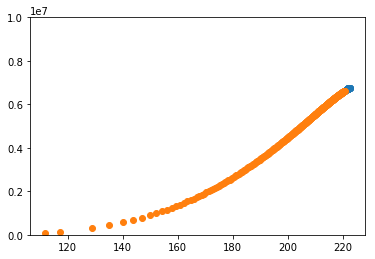

In [288]:
plt.scatter(T,P_grid)
plt.scatter(T2,P_grid2)

plt.ylim(0,1e7)
plt.show()

(988,)
(988,)


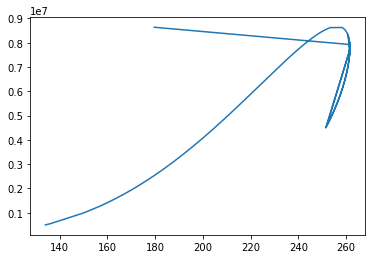

In [208]:
tall=np.concatenate(np.array([T2,T]),0)
print(tall.shape)
pau=np.concatenate(np.array([P_grid2,P_grid]),0)
print(pau.shape)
plt.plot(tall,pau)
plt.show()

In [ ]:
#